Text(0, 0.5, 'Probability')

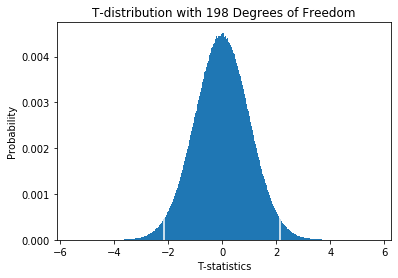

In [3]:
# Chapter19: 無作為試験(無作為抽出試験)と仮説の照合
# 19.1
import scipy
import pylab
import random

tStat = -2.13165598142 # PED-Xの例のt統計量
tDist = []
numBins = 1000
for i in range(10000000):
    tDist.append(scipy.random.standard_t(198)) # t分布

pylab.hist(tDist, bins=numBins, weights = pylab.array(len(tDist)*[1.0])/len(tDist))
pylab.axvline(tStat, color='w')
pylab.axvline(-tStat,color='w')
pylab.title('T-distribution with 198 Degrees of Freedom')
pylab.xlabel('T-statistics')
pylab.ylabel('Probability')


In [4]:
# 19.2
controlMean = sum(controlTimes)/len(controlTimes)
treatmentMean = sum(treatmentTimes)/len(treatmentTimes)
print('Treatment mean- control mean =', treatmentMean - controlMean, 'minutes')
twoSampleTest = stats.ttest_ind(treatmentTimes, controlTimes, equal_var = False)
print()

NameError: name 'controlTimes' is not defined

In [7]:
# 19.3 Create Examples
from scipy import stats
treatmentDist = (119.5,5.0)
controlDist = (120,4.0)
sampleSize = 100
treatmentTimes, controlTimes = [],[]
for s in range(sampleSize):
    treatmentTimes.append(random.gauss(treatmentDist[0],treatmentDist[1]))
    controlTimes.append(random.gauss(controlDist[0],controlDist[1]))

In [8]:
# 19.2
controlMean = sum(controlTimes)/len(controlTimes)
treatmentMean = sum(treatmentTimes)/len(treatmentTimes)
print('Treatment mean- control mean =', treatmentMean - controlMean, 'minutes')
twoSampleTest = stats.ttest_ind(treatmentTimes, controlTimes, equal_var = False)
print()

Treatment mean- control mean = -0.8316977544221231 minutes



In [9]:
#
numGames = 1273
lyndsayWins = 666
outcomes = [1.0]*lyndsayWins + [0.0]*(numGames-lyndsayWins)
print('The p-value from a one-sample test is', stats.ttest_1samp(outcomes,0.5)[1]) # 実験の平均値: 0.5 勝つか負けるかなので

The p-value from a one-sample test is 0.0982205871243577


In [10]:
# 19.4 モンテカルロシミュレーション(片側検定)
from scipy import stats
numGames = 1273
lyndsayWins = 666
numTrials = 10000
atLeast = 0
for t in range(numTrials):
    LWins = 0
    for g in range(numGames):
        if random.random() < 0.5:
            LWins += 1
    if LWins >= lyndsayWins:
        atLeast += 1
print('Probability of result at least this extreme by accident =', atLeast/numTrials)

Probability of result at least this extreme by accident = 0.0534


In [11]:
# 19.5 正しいシミュレーション
from scipy import stats
numGames = 1273
lyndsayWins = 666
numTrials = 10000
atLeast = 0
for t in range(numTrials):
    LWins,JWins = 0,0
    for g in range(numGames):
        if random.random() < 0.5:
            LWins += 1
        else:
            JWins += 1
    if LWins >= lyndsayWins or JWins >= lyndsayWins:
        atLeast += 1
print('Probability of result at least this extreme by accident =', atLeast/numTrials)

Probability of result at least this extreme by accident = 0.1036
